# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

In [1]:
#Importing the necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The raw dataset has 614 rows and 13 columns

## Understanding the Dataset and EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It is clear to note that the dataset is a mixture of different datatypes throughout the dataset.

Columns Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, and Loan_Status have object datatypes, while columns CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History have float64 datatype. Only column ApplicantIncome has int64 datatype.

In [4]:
#Checking for null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Let us proceed in removing the null values from the dataset.

In [5]:
df.dropna(inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Visualizing Loan_Status Column

Y    332
N    148
Name: Loan_Status, dtype: int64

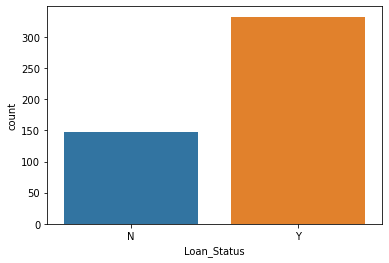

In [6]:
# Loan Status Count
sb.countplot(x=df['Loan_Status'])
df["Loan_Status"].value_counts()

We can observe that about 68.72% of people who applied for loans have been granted loans, whereas 31.28% of people were rejected due to several reasons.

## Gender vs Loan_Status 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

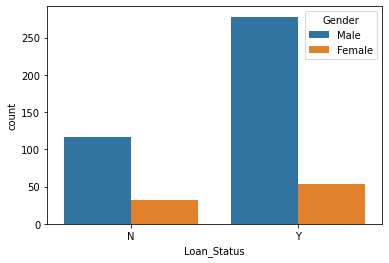

In [7]:
sb.countplot(x=df['Loan_Status'], hue = df['Gender'], data = df)

It is clear to observe that the majority of individuals that were denied loans were Men

##  Married vs Loan_Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

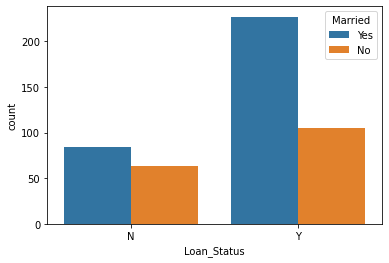

In [8]:
sb.countplot(x=df['Loan_Status'], hue = df['Married'], data = df)

It is clear to note that majority of people that were granted loans were married

## Education vs Loan_Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

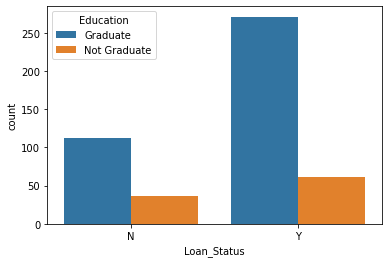

In [9]:
sb.countplot(x=df['Loan_Status'], hue = df['Education'], data = df)

The above graph goes onto show that a gradute is more likely to be granted a loan, rather than a non-graduate

## Property_Area vs Loan_Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

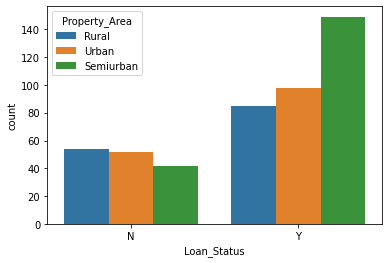

In [10]:
sb.countplot(x=df['Loan_Status'], hue = df['Property_Area'], data = df)

The above graph shows us that the people who live in Semiurban areas are more likey to be offered the loan, compared to Urban and Rural areas

## Label Encoder 

In [11]:
#Label encoding object datatypes with Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


As we can see, we have label encoded all object datatype columns to integers.

We do this to improve the quality of the Machine Learning model we intend to build.

We can see in the above dataset that column Loan_ID is a redundant column. Hence, let us remove the column.

In [13]:
df.drop("Loan_ID", axis = 1, inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


The dataset now reduces to 480 rows and 12 columns

## Building a Predictive Model 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
X = df.drop("Loan_Status", axis = 1)
Y = df["Loan_Status"]

In [18]:
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [19]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32


Since we are trying to predict whether the loan was granted or not, our problem here is that of a classification. 

Hence, let us proceed in building a classification machine learning model.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

## Support Vector Classifier

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)

In [23]:
svc.score(X_train,Y_train)

0.7083333333333334

In [24]:
print(accuracy_score(Y_test,predsvc))

0.6666666666666666


In [25]:
print(confusion_matrix(Y_test,predsvc))

[[ 0 48]
 [ 0 96]]


In [26]:
print(classification_report(Y_test,predsvc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.67      1.00      0.80        96

    accuracy                           0.67       144
   macro avg       0.33      0.50      0.40       144
weighted avg       0.44      0.67      0.53       144



In [27]:
scoresvc=cross_val_score(svc,X,Y,cv=5)
print(scoresvc)
print(scoresvc.mean())
print(scoresvc.std())

[0.6875     0.6875     0.6875     0.69791667 0.69791667]
0.6916666666666667
0.00510310363079827


## K-Neighbours Classifier 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knc = KNeighborsClassifier()
knc.fit(X_train,Y_train)
predknc=knc.predict(X_test)

In [30]:
knc.score(X_train,Y_train)

0.7708333333333334

In [31]:
print(accuracy_score(Y_test,predknc))

0.6458333333333334


In [32]:
print(confusion_matrix(Y_test,predknc))

[[ 9 39]
 [12 84]]


In [33]:
print(classification_report(Y_test,predknc))

              precision    recall  f1-score   support

           0       0.43      0.19      0.26        48
           1       0.68      0.88      0.77        96

    accuracy                           0.65       144
   macro avg       0.56      0.53      0.51       144
weighted avg       0.60      0.65      0.60       144



In [34]:
scoreknc=cross_val_score(knc,X,Y,cv=5)
print(scoreknc)
print(scoreknc.mean())
print(scoreknc.std())

[0.67708333 0.67708333 0.66666667 0.58333333 0.64583333]
0.6500000000000001
0.0352323635943495


## Decision Tree Classifier 

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)

In [37]:
dtc.score(X_train,Y_train)

1.0

In [38]:
print(accuracy_score(Y_test,preddtc))

0.6805555555555556


In [39]:
print(confusion_matrix(Y_test,preddtc))

[[24 24]
 [22 74]]


In [40]:
print(classification_report(Y_test,preddtc))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        48
           1       0.76      0.77      0.76        96

    accuracy                           0.68       144
   macro avg       0.64      0.64      0.64       144
weighted avg       0.68      0.68      0.68       144



In [41]:
scoredtc=cross_val_score(dtc,X,Y,cv=5)
print(scoredtc)
print(scoredtc.mean())
print(scoredtc.std())

[0.71875    0.64583333 0.72916667 0.72916667 0.71875   ]
0.7083333333333333
0.03159531435021477


## Random Forest Classifier 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)

In [44]:
rfc.score(X_train,Y_train)

1.0

In [45]:
print(accuracy_score(Y_test,predrfc))

0.7847222222222222


In [46]:
print(confusion_matrix(Y_test,predrfc))

[[23 25]
 [ 6 90]]


In [47]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60        48
           1       0.78      0.94      0.85        96

    accuracy                           0.78       144
   macro avg       0.79      0.71      0.73       144
weighted avg       0.79      0.78      0.77       144



In [48]:
scorerfc=cross_val_score(rfc,X,Y,cv=5)
print(scorerfc)
print(scorerfc.mean())
print(scorerfc.std())

[0.79166667 0.76041667 0.8125     0.82291667 0.82291667]
0.8020833333333333
0.02375365468956538


Comparing the above scores, before and after cross validation, we can see that Support Vector Classifier is the best model to predict the Loan_Status.

This is because the difference between the scores before and after cross validation is the least compared to other models.